In [1]:
%matplotlib inline
import os
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shutil
import cv2
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:

from PIL import Image
parentdir = "C:\\Users\\Abhishek\\Downloads\\Data\\food_images"
destdir = "C:\\Users\\Abhishek\\Downloads\\Data\\shrinked_food_images"
for imgfile in os.listdir(parentdir):
    img = Image.open(os.path.join(parentdir,imgfile))
    width, height = img.size
    size= int(round(0.2*width)),int(round(0.2*height))
    img.thumbnail(size,Image.ANTIALIAS)
    img.save(os.path.join(destdir,imgfile))

In [24]:
#calculating sift
detect = cv2.FeatureDetector_create("SIFT")
extract = cv2.DescriptorExtractor_create("SIFT")
def feature_sift(filename):
    im = cv2.imread(filename,0)
    return extract.compute(im,detect.detect(im))[1]
parentdir = "D:\\Academics\\Courses\\MachineLearning\\Project\\shrinked_food_images\\shrinked_food_images"
siftdict = {}
for imgfile in os.listdir(parentdir):
    siftdict[imgfile] = feature_sift(os.path.join(parentdir,imgfile))
pickle.dump(siftdict,open("D:\\Academics\\Courses\\MachineLearning\\Project\\thumbcolorsiftfeat.pkl","wb"))

KeyboardInterrupt: 

In [60]:
#calculating surf

def feature_surf(filename):
    surf = cv2.SURF(250)
    img = cv2.imread(filename,0)
    kp, des = surf.detectAndCompute(img,None)
    return des
parentdir = "D:\\Academics\\Courses\\MachineLearning\\Project\\shrinked_food_images\\shrinked_food_images"
siftdict = {}
for imgfile in os.listdir(parentdir):
    siftdict[imgfile] = feature_surf(os.path.join(parentdir,imgfile))
pickle.dump(siftdict,open("D:\\Academics\\Courses\\MachineLearning\\Project\\thumbcolorsurffeat.pkl","wb"))

In [53]:
#train/test split
#train test split
parentdir = "D:\\Academics\\Courses\\MachineLearning\\Project\\shrinked_food_images\\shrinked_food_images"
parentdirtest2 = "D:\\Academics\\Courses\\MachineLearning\\Project\\test_food_images"
from sklearn.cross_validation import StratifiedShuffleSplit
labeldict = {'d':0,'p':1,'br':2,'s':3,'t':4,'bo':5}
imgfilelist = []
imglabels = []
imgtest2list = []
imgtest2labels = []

for imgfile in os.listdir(parentdir):
    imgfilelist.append(imgfile)
    if(imgfile[:1]=="b"):
        imglabels.append(labeldict[imgfile[:2]])
    else:
        imglabels.append(labeldict[imgfile[:1]])
imgfilelist = np.array(imgfilelist)
imglabels = np.array(imglabels)

for imgfile in os.listdir(parentdirtest2):
    imgtest2list.append(imgfile)
    if(imgfile[:1]=="b"):
        imgtest2labels.append(labeldict[imgfile[:2]])
    else:
        imgtest2labels.append(labeldict[imgfile[:1]])
test2_imgfile = np.array(imgtest2list)
test2_imglabels = np.array(imgtest2labels)


sss = StratifiedShuffleSplit(imglabels,6,test_size=0.2,random_state=0)
for train_index, test_index in sss:
    train_imgfile,test_imgfile = imgfilelist[train_index],imgfilelist[test_index]
    train_imglabels,test_imglabels = imglabels[train_index],imglabels[test_index]

In [ ]:
#calculating surf


In [7]:
siftdict = pickle.load(open("D:\\Academics\\Courses\\MachineLearning\\Project\\thumbcolorsiftfeat.pkl","rb"))
#creating bow train
detect = cv2.FeatureDetector_create("SIFT")
extract = cv2.DescriptorExtractor_create("SIFT")

flann_params = dict(algorithm = 1, trees = 5)      # flann enums are missing, FLANN_INDEX_KDTREE=1
matcher = cv2.FlannBasedMatcher(flann_params, {})  # need to pass empty dict (#1329)
bow_train   = cv2.BOWKMeansTrainer(100) 
bow_extract = cv2.BOWImgDescriptorExtractor(extract, matcher)
def feature_bow(fn):
    im = cv2.imread(fn,0)
    return bow_extract.compute(im, detect.detect(im))

for imgfile in train_imgfile:
    siftfeatures = siftdict[imgfile]
    if(siftfeatures is not None and siftfeatures.size is not 0):
        bow_train.add(siftfeatures)
        print "training "+imgfile
voc = bow_train.cluster()
bow_extract.setVocabulary(voc)


training d15.jpg
training d61.jpg
training p36.jpg
training bo37.jpg
training p172.jpg
training br56.jpg
training br106.jpg
training p155.jpg
training br91.jpg
training p152.jpg
training s12.jpg
training d228.jpg
training br47.jpg
training br19.jpg
training bo41.jpg
training bo4.jpg
training d190.jpg
training t32.jpg
training d219.jpg
training d131.jpg
training bo8.jpg
training d145.jpg
training p104.jpg
training s50.jpg
training p81.jpg
training d124.jpg
training d197.jpg
training s23.jpg
training d208.jpg
training d114.jpg
training t6.jpg
training bo7.jpg
training d139.jpg
training d212.jpg
training d224.jpg
training d56.jpg
training bo39.jpg
training p96.jpg
training d191.jpg
training br16.jpg
training p0.jpg
training p56.jpg
training bo0.jpg
training br69.jpg
training s64.jpg
training p141.jpg
training d38.jpg
training br53.jpg
training d59.jpg
training d104.jpg
training d137.jpg
training d73.jpg
training p176.jpg
training p1.jpg
training p17.jpg
training p42.jpg
training d167.jpg


In [61]:
siftdict = pickle.load(open("D:\\Academics\\Courses\\MachineLearning\\Project\\thumbcolorsurffeat.pkl","rb"))
#creating bow train
detect = cv2.FeatureDetector_create("SURF")
extract = cv2.DescriptorExtractor_create("SURF")

flann_params = dict(algorithm = 1, trees = 5)      # flann enums are missing, FLANN_INDEX_KDTREE=1
matcher = cv2.FlannBasedMatcher(flann_params, {})  # need to pass empty dict (#1329)
bow_train   = cv2.BOWKMeansTrainer(100) 
bow_extract = cv2.BOWImgDescriptorExtractor(extract, matcher)
def feature_bow_surf(fn):
    im = cv2.imread(fn,0)
    return bow_extract.compute(im, detect.detect(im))

for imgfile in train_imgfile:
    siftfeatures = siftdict[imgfile]
    if(siftfeatures is not None and siftfeatures.size is not 0):
        bow_train.add(siftfeatures)
        print "training "+imgfile
voc = bow_train.cluster()
bow_extract.setVocabulary(voc)

training d15.jpg
training d61.jpg
training p36.jpg
training bo37.jpg
training p172.jpg
training br56.jpg
training br106.jpg
training p155.jpg
training br91.jpg
training p152.jpg
training d228.jpg
training br47.jpg
training br19.jpg
training bo41.jpg
training bo4.jpg
training d190.jpg
training t32.jpg
training d219.jpg
training d131.jpg
training bo8.jpg
training d145.jpg
training p104.jpg
training s50.jpg
training p81.jpg
training d124.jpg
training d197.jpg
training s23.jpg
training d208.jpg
training d114.jpg
training t6.jpg
training bo7.jpg
training d139.jpg
training d212.jpg
training d224.jpg
training d56.jpg
training bo39.jpg
training p96.jpg
training d191.jpg
training br16.jpg
training p0.jpg
training p56.jpg
training bo0.jpg
training br69.jpg
training s64.jpg
training p141.jpg
training d38.jpg
training br53.jpg
training d59.jpg
training d104.jpg
training d137.jpg
training d73.jpg
training p176.jpg
training p1.jpg
training p17.jpg
training p42.jpg
training d167.jpg
training s32.jpg


In [6]:

pickle.dump(train_imgfile,open("trainimgfiles.pkl","wb"))
pickle.dump(test_imgfile,open("testimgfiles.pkl","wb"))
pickle.dump(train_imglabels,open("trainimglabels.pkl","wb"))
pickle.dump(test_imglabels,open("testimglabels.pkl","wb"))

In [4]:
def hist_features(fn):
    gray = cv2.imread(fn,0)
    hist = cv2.calcHist(gray,[0],None,[256],[0,256])
    return hist[:,0]
histtraindata = []
histtestdata = []
parentdir = "D:\\Academics\\Courses\\MachineLearning\\Project\\shrinked_food_images\\shrinked_food_images"
for imgfile in train_imgfile:
    histtraindata.append(hist_features(os.path.join(parentdir,imgfile)))
for imgfile in test_imgfile:
    histtestdata.append(hist_features(os.path.join(parentdir,imgfile)))

In [58]:
def feature_hog2(filename):
    bin_n = 16
    img = cv2.imread(filename)
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist
histtraindata = []
histtestdata = []
histtest2data = []
parentdir = "D:\\Academics\\Courses\\MachineLearning\\Project\\shrinked_food_images\\shrinked_food_images"
parentdirtest2 = "D:\\Academics\\Courses\\MachineLearning\\Project\\test_food_images"
siftdict = {}
for imgfile in train_imgfile:
    hoghist = np.hstack((feature_hog2(os.path.join(parentdir,imgfile)),hist_features(os.path.join(parentdir,imgfile))))
    histtraindata.append(hoghist)
for imgfile in test_imgfile:
    hoghist = np.hstack((feature_hog2(os.path.join(parentdir,imgfile)),hist_features(os.path.join(parentdir,imgfile))))
    histtestdata.append(hoghist)
pickle.dump(siftdict,open("D:\\Academics\\Courses\\MachineLearning\\Project\\thumbcolorshogfeat.pkl","wb"))

In [14]:
for imgfile in test2_imgfile:
    hoghist = np.hstack((feature_hog2(os.path.join(parentdirtest2,imgfile)),hist_features(os.path.join(parentdirtest2,imgfile))))
    histtest2data.append(hoghist)

In [11]:
#generating training data for Classifier
traindata = []
for imgfile in train_imgfile:
    print imgfile
    bowf = feature_bow(os.path.join(parentdir,imgfile))
    if (bowf is not None):
        try:
            traindata.extend(bowf)
        except:
            continue
pickle.dump(traindata,open("sift100traindataBOW.pkl","wb"))
print "Done with training"
#,np.array(),np.array(),params)
testdata = []

for imgfile in test_imgfile:
    print imgfile
    bowf = feature_bow(os.path.join(parentdir,imgfile))
    
    if (bowf is not None):
        testdata.extend(bowf)
pickle.dump(testdata,open("sift100testdataBOW.pkl","wb"))
print "done with predictions"

d15.jpg
d61.jpg
p36.jpg
bo37.jpg
p172.jpg
br56.jpg
br106.jpg
p155.jpg
br91.jpg
p152.jpg
s12.jpg
d228.jpg
br47.jpg
br19.jpg
bo41.jpg
bo4.jpg
d190.jpg
t32.jpg
d219.jpg
d131.jpg
bo8.jpg
d145.jpg
p104.jpg
s50.jpg
p81.jpg
d124.jpg
d197.jpg
s23.jpg
d208.jpg
d114.jpg
t6.jpg
bo7.jpg
d139.jpg
d212.jpg
d224.jpg
d56.jpg
bo39.jpg
p96.jpg
d191.jpg
br16.jpg
p0.jpg
p56.jpg
bo0.jpg
br69.jpg
s64.jpg
p141.jpg
d38.jpg
br53.jpg
d59.jpg
d104.jpg
d137.jpg
d73.jpg
p176.jpg
p1.jpg
p17.jpg
p42.jpg
d167.jpg
s32.jpg
d189.jpg
s67.jpg
d211.jpg
d142.jpg
s19.jpg
br76.jpg
p35.jpg
br18.jpg
d178.jpg
p55.jpg
br3.jpg
br1.jpg
p129.jpg
p122.jpg
br80.jpg
br8.jpg
s21.jpg
p5.jpg
p67.jpg
br63.jpg
br64.jpg
p40.jpg
bo33.jpg
p161.jpg
p158.jpg
br90.jpg
d168.jpg
p7.jpg
br33.jpg
p136.jpg
s14.jpg
t1.jpg
br83.jpg
d140.jpg
d133.jpg
d116.jpg
p170.jpg
d158.jpg
p171.jpg
br73.jpg
d20.jpg
p174.jpg
bo5.jpg
d63.jpg
d169.jpg
br66.jpg
d229.jpg
p19.jpg
s2.jpg
d109.jpg
p118.jpg
s9.jpg
p60.jpg
d174.jpg
br35.jpg
t28.jpg
s43.jpg
s34.jpg
p103.jpg
p16

In [55]:
traindata = []
testdata = []
#newtraindata = np.hstack((traindata,histtraindata))
#newtestdata = np.hstack((testdata,histtestdata))
traindata = histtraindata
testdata = histtestdata
test2data = histtest2data

In [10]:
print np.array(newtraindata).shape
print np.array(newtestdata).shape
#print len(train_imglabels)

(540L, 64L)
(136L, 64L)


In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy
#running the classifier
count=0
#for imglabel in train_imglabels:
#    if(imglabel==1 or imglabel==2):
#        newtraindata.append(traindata[count])
#        newtrainlabel.append(train_imglabels[count])
#        count+=1

all_xs = numpy.zeros(20)
all_accuracy = numpy.zeros(20)
all_accuracy2 = numpy.zeros(20)
#all_validationloss = numpy.zeros(100)
j = 100
i = 0
while i < 10:
    #clf = RandomForestClassifier(n_estimators = j)
    clf = svm.LinearSVC(C=j)
    #clf = AdaBoostClassifier(
    #DecisionTreeClassifier(max_depth=7),
    # n_estimators=j,
    # learning_rate=1)
    clf.fit(np.array(traindata),train_imglabels)
    predictions = []
    predictions.extend(clf.predict(testdata))
    predictions = np.array(predictions)
    all_accuracy[i]=accuracy_score(test_imglabels,predictions) * 100
    print j
    #predictions2 = []
    #predictions2.extend(clf.predict(test2data))
    #predictions2 = np.array(predictions2)
    #all_accuracy2[i]=accuracy_score(test2_imglabels,predictions2) * 100
    all_xs[i] = j
    j = j + 100
    i = i + 1
    


#clf = RandomForestClassifier(n_estimators = 15)
# clf = AdaBoostClassifier(
#    DecisionTreeClassifier(max_depth=7),
#     n_estimators=400,
#     learning_rate=1)
#clf = svm.LinearSVC(C=1000)
#clf = svm.SVC()
#clf.fit(np.array(traindata),train_imglabels)
#print(traindata[1].shape)
#predictions = []
#count = 0
#predictions.extend(clf.predict(testdata))
#print len(predictions)

100
200
300
400
500
600
700
800
900
1000


[ 250.  275.  300.  325.  350.  375.  400.  425.  450.  475.]
[ 95.58823529  95.58823529  95.58823529  95.58823529  94.85294118
  95.58823529  94.85294118  95.58823529  95.58823529  95.58823529]


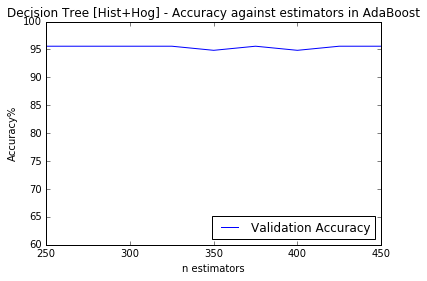

In [80]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
#ax.plot(all_xs,100-all_accuracy2,'-r', label='Test Error')
ax.plot(all_xs, all_accuracy,'-b',label='Validation Accuracy')
print all_xs
print all_accuracy
#print all_accuracy2
plt.legend(loc='lower right')
plt.axis([250,450,60,100])
plt.xlabel('n estimators')
plt.ylabel('Accuracy%')
plt.title('Decision Tree [Hist+Hog] - Accuracy against estimators in AdaBoost')
plt.show()

In [52]:
print predictions
print test_imglabels
print test_imgfile

[1 1 4 0 0 5 1 3 0 0 2 2 0 3 0 2 0 5 1 0 2 0 3 3 0 1 1 3 2 0 0 4 4 5 0 5 2
 2 1 1 1 1 5 0 1 1 2 0 0 2 1 0 0 1 5 5 0 1 1 0 3 1 1 1 2 0 0 0 0 2 0 0 2 2
 0 1 1 0 1 0 2 0 1 3 2 0 1 3 0 0 2 3 3 2 4 1 2 0 1 5 1 2 0 0 1 0 1 2 3 0 1
 1 0 2 0 0 1 0 2 3 1 1 5 0 0 4 0 0 3 0 1 1 5 0 0 5]
[1 1 4 2 0 5 1 3 0 0 2 2 0 3 0 2 0 5 1 0 2 0 3 3 0 1 1 3 2 0 0 4 4 4 0 5 2
 2 1 1 1 1 5 0 1 1 2 0 0 2 1 0 0 1 5 4 0 1 1 0 3 1 1 1 2 0 0 0 0 2 0 0 2 2
 0 1 1 0 1 1 2 0 1 3 2 0 3 3 0 0 2 3 3 5 4 1 2 0 1 5 1 2 0 0 1 0 1 2 3 0 1
 1 0 2 0 0 1 0 2 3 1 1 4 0 0 5 0 0 3 0 1 1 5 2 0 5]
['p92.jpg' 'p146.jpg' 't9.jpg' 'br58.jpg' 'd93.jpg' 'bo24.jpg' 'p135.jpg'
 's16.jpg' 'd37.jpg' 'd35.jpg' 'br24.jpg' 'br92.jpg' 'd106.jpg' 's47.jpg'
 'd150.jpg' 'br108.jpg' 'd135.jpg' 'bo43.jpg' 'p167.jpg' 'd180.jpg'
 'br109.jpg' 'd26.jpg' 's7.jpg' 's35.jpg' 'd136.jpg' 'p112.jpg' 'p127.jpg'
 's11.jpg' 'br48.jpg' 'd83.jpg' 'd203.jpg' 't7.jpg' 't15.jpg' 't0.jpg'
 'd172.jpg' 'bo31.jpg' 'br88.jpg' 'br89.jpg' 'p99.jpg' 'p102.jpg' 'p30.jpg'
 'p86.jp

In [81]:
#evaluating the result
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(np.array(traindata),train_imglabels)
predictions = []
predictions.extend(clf.predict(testdata))
predictions = np.array(predictions)
cf = confusion_matrix(test_imglabels,predictions)
acc =  accuracy_score(test_imglabels,predictions)

#predictions_test2 = []
#predictions_test2.extend(clf.predict(test2data))
#predictions_test2 = np.array(predictions_test2)
#cf_test2 = confusion_matrix(test2_imglabels,predictions_test2)
#print accuracy_score(test2_imglabels,predictions_test2)


print test2_imglabels
print predictions_test2
#pickle.dump(cf,open("C:\\Users\\Abhishek\\Downloads\\mlcsproject\\ada100sift.pkl","wb"))

[5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[]


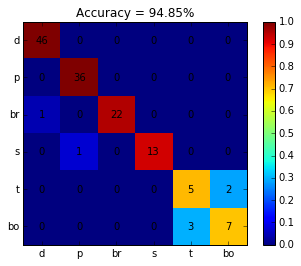

In [82]:
#printing confusion matrix
import matplotlib.pyplot as plt
norm_conf = []
for i in cf:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        if(a == 0):
            tmp_arr.append(0)
        else:
            tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cf.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(cf[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = ['d','p','br','s','t','bo']
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.title('Accuracy = {0:.2f}%'.format(acc*100))
plt.savefig('hog_hist_lr.png', format='png')

In [ ]:
traindata[0].shape

In [ ]:
np.array(traindata).shape